In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense

In [2]:
(training_images, training_labels), (test_images, test_labels) = datasets.mnist.load_data()
print("training_images.shape:",training_images.shape)
print("test_images.shape:",test_images.shape)

training_images.shape: (60000, 28, 28)
test_images.shape: (10000, 28, 28)


7


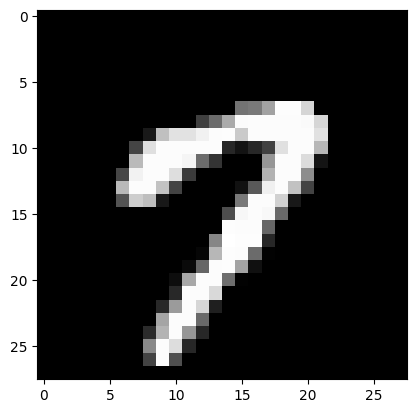

In [3]:
# 稍微看一下資料的樣子
index = 15
print(training_labels[index])
plt.imshow(training_images[index],cmap='gray')

In [ ]:
# 把後面二維的部分攤平成一維
t_training_images = training_images.reshape(60000, 784)
t_test_images = test_images.reshape(10000, 784)

#轉換格式為 float32
t_training_images = t_training_images.astype('float32')
t_test_images = t_test_images.astype('float32')

# 將數值做正規化
t_training_images  = t_training_images / 255.0
t_test_images = t_test_images / 255.0

# 如果使用 sparse_categorical_crossentropy 就不需要做 One Hot Encoding 
# https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E5%81%9Aone-hot-encoding-b5126d3f8a63
num_classes=10
training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
# 建立屬於自己的 model
model = Sequential()
model.add(Dense(128, input_dim=784, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
# 編譯模型, 並輸出內部數值
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.summary()

In [ ]:
model.fit(t_training_images, training_labels, epochs=10, batch_size=128)

In [ ]:
loss, acc = model.evaluate(t_test_images, test_labels, batch_size=128)
print("loss rate:", loss, " accuracy: " , (100.0 * acc))

In [ ]:
# 把模型儲存成 h5 格式
model.save('mnist_basic_model.h5',save_format='h5')